Set up

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from src.diagnostic_agent import build_joint_probability, inference_by_enumeration

Load Data and Build Models

In [2]:
df = pd.read_csv("data/normalized_health_data.csv")
arr = df[["Symptom1","Symptom2","Symptom3","Symptom4","Condition"]].values

# Without smoothing
joint_ns = build_joint_probability(arr, alpha=0)
post_ns = inference_by_enumeration(joint_ns, [1,-1,-1,1,-2])

# With smoothing
joint_s  = build_joint_probability(arr, alpha=1.0)
post_s   = inference_by_enumeration(joint_s, [1,-1,-1,1,-2])


Plot Posterior Comparison

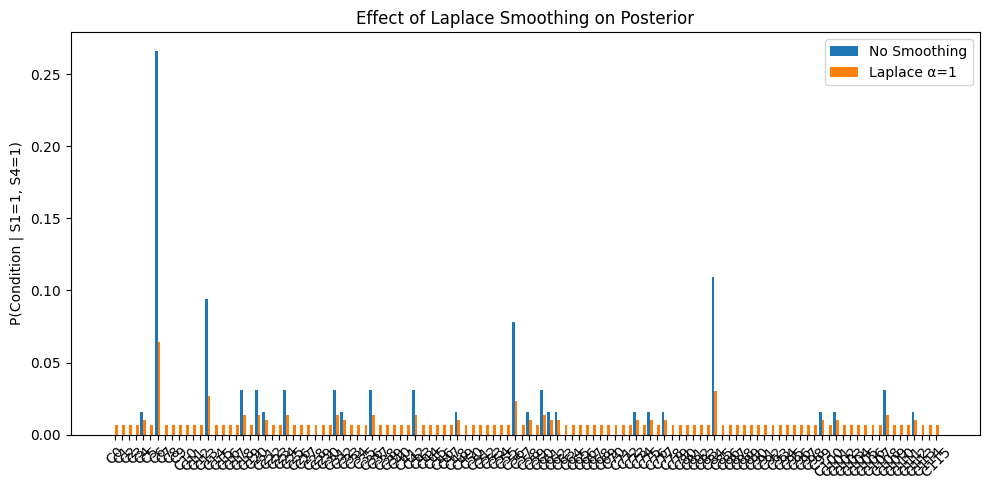

In [3]:
labels = [f"C{i}" for i in range(len(post_ns))]
x = np.arange(len(labels))

plt.figure(figsize=(10,5))
plt.bar(x - 0.2, post_ns, width=0.4, label="No Smoothing")
plt.bar(x + 0.2, post_s,  width=0.4, label="Laplace α=1")
plt.xticks(x, labels, rotation=45)
plt.ylabel("P(Condition | S1=1, S4=1)")
plt.legend()
plt.title("Effect of Laplace Smoothing on Posterior")
plt.tight_layout()
plt.show()


Marginals Visualization

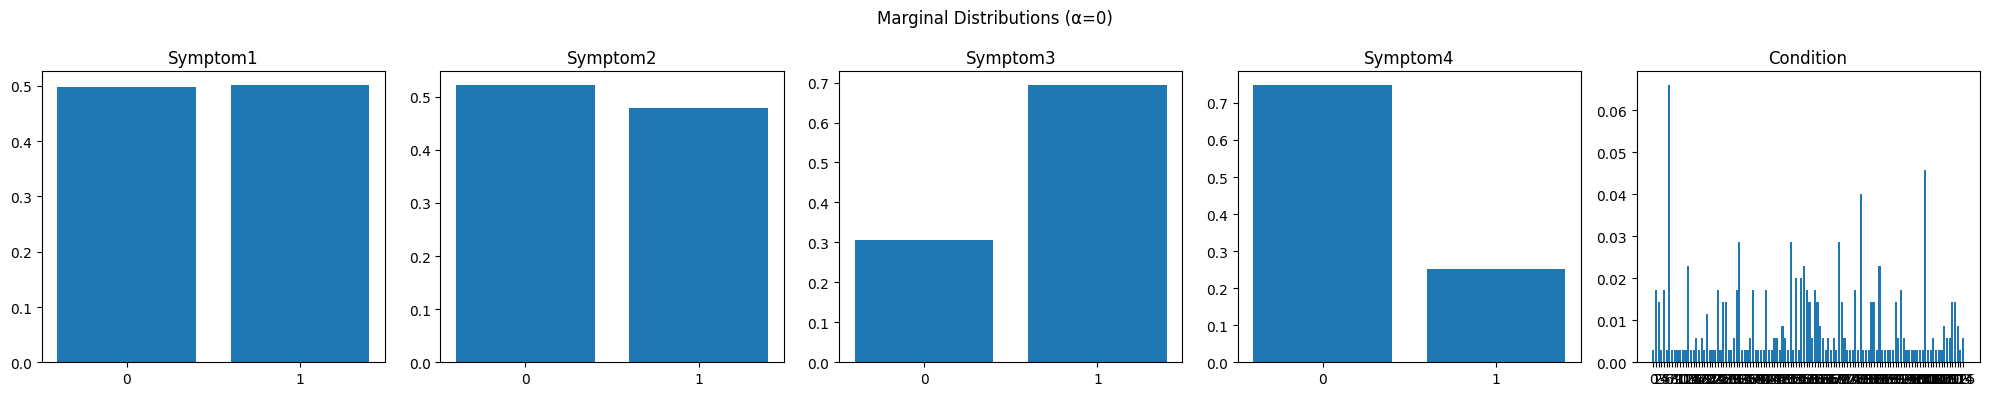

In [4]:
# Compute marginals
from src.analyze_marginals import compute_all_marginals
marg = compute_all_marginals(joint_ns)

fig, axes = plt.subplots(1, 5, figsize=(20,4))
for ax, (name, dist) in zip(axes, marg.items()):
    ax.bar(range(len(dist)), dist)
    ax.set_title(name)
    ax.set_xticks(range(len(dist)))
plt.suptitle("Marginal Distributions (α=0)")
plt.tight_layout()
plt.show()
